# Práctica 4
## Regresión Lineal

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn.objects as so

from gapminder import gapminder

from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

### Ejercicio 1.a

Implementar una función que calcule la pendiente y la ordenada al origen de la recta de
regresión lineal con las fórmulas vistas en clase.

In [11]:
# Función que calcula la pendiente y ordenada:

def coefs_rfl(x,y):
    promedio_x = np.mean(x)
    promedio_y = np.mean(y)
    beta_1 = (np.sum((x - promedio_x) * (y-promedio_y)) / np.sum((x - promedio_x) ** 2))
    beta_0 = promedio_y - beta_1 * promedio_x

    return beta_1, beta_0

# Hagamos un par de pruebas, creamos una serie "x", mientras que a la variable "y" la creamos a partir
# de multiplicar el valor de "x" por 7, sumarle la ordenada 3 y agregar un poco de error con np.random.rand(3)

x = pd.Series([1,2,3])
y = 7 * x + 3 + np.random.rand(3)

# Imprimimos los valores, y vemos que se asemejan a los correctos, 7 y 3

print(coefs_rfl(x, y))

(7.0016792404445365, 3.093088704142378)


### Ejercicio 1.b

Con el dataset ``gapminder``, utilizar la función implementada en el item anterior para
realizar una regresión lineal entre los años y la expectiva de vida en Argentina. Comparar
los coeficientes con los obtenidos por ``scikit-learn``.

In [12]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Esto no es del ejercicio en sí, pero permite calcular el tiempo que lleva realizar determinadas acciones.
Lo hicimos para comprobar que utilizar .query en el dataset es mucho más lento que acceder haciendo
``gapminder[gapminder.country=="Argentina"]``

In [51]:
%%timeit
gapminder.query('country=="Argentina"')

580 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
gapminder[gapminder.country=="Argentina"]

120 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [37]:
from sklearn import linear_model    # Herramientas de modelos lineales

# Obtengo los datos de Argentina
datos_argentina = gapminder[gapminder.country=="Argentina"]

# Llamamos a la función que cree previamente
print(coefs_rfl(datos_argentina["year"], datos_argentina["lifeExp"]))

# Hacemos lo mismo utilizando scikit-learn
modelo = linear_model.LinearRegression()
modelo.fit(datos_argentina[["year"]], datos_argentina.lifeExp)

beta_1 = modelo.coef_
beta_0 = modelo.intercept_

print(beta_1 , beta_0)

# 👇 Vemos que los valores calculados son iguales

(0.2317083916083916, -389.6063445221445)
[0.23170839] -389.6063445221444


In [44]:
# Calculemos el error cuadratico medio y el score r2:

y_pred = modelo.predict(datos_argentina[["year"]])

print(mean_squared_error(datos_argentina[['lifeExp']], y_pred))
print(r2_score(datos_argentina[['lifeExp']], y_pred))

0.07120290957653445
0.9955680955772934


### Ejercicio 2.a

Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie y el precio de cada imueble

In [48]:
datos = pd.read_csv("../../Datos/inmuebles.csv")
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


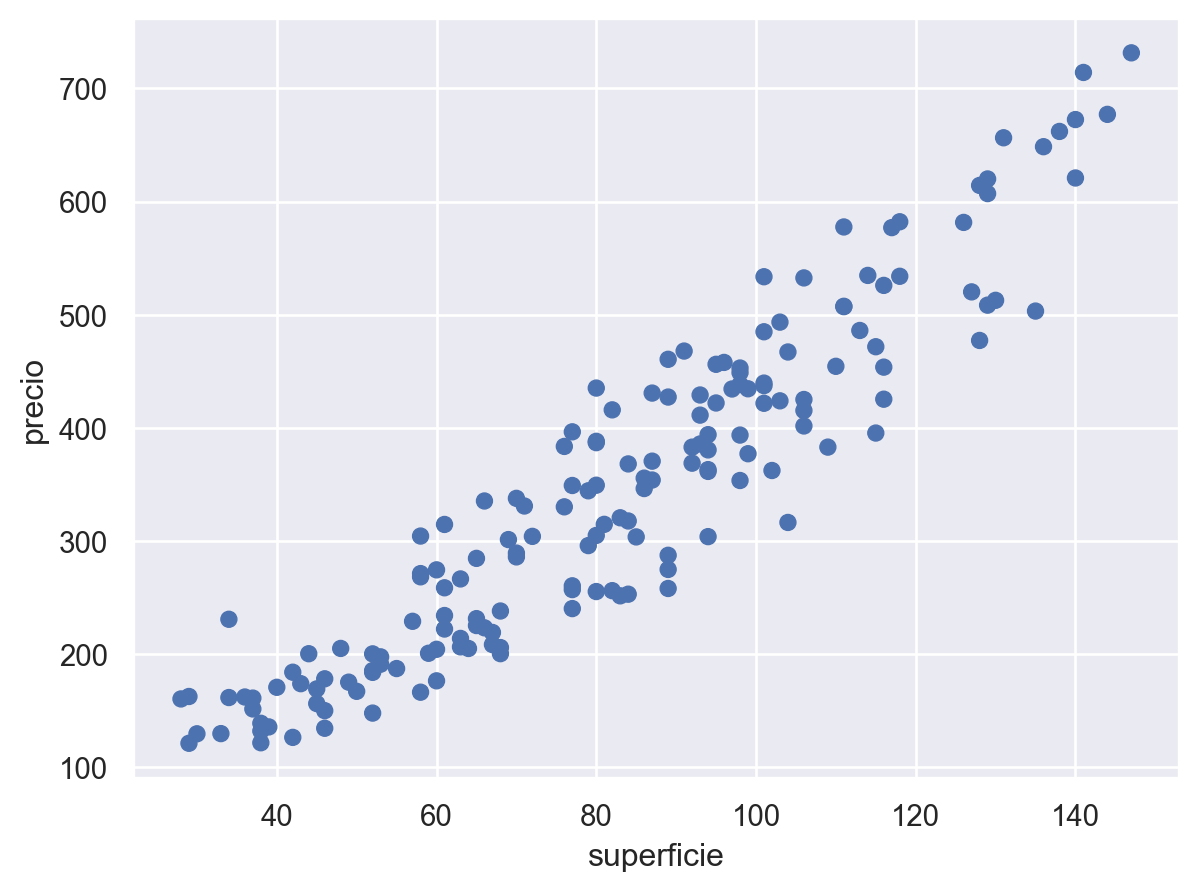

In [59]:
so.Plot(data=datos, x='superficie', y='precio').add(so.Dot())